In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model = nn.Sequential(
    nn.Linear(2, 5),
    nn.Sigmoid(),
    nn.Linear(5, 1),
)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.9)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


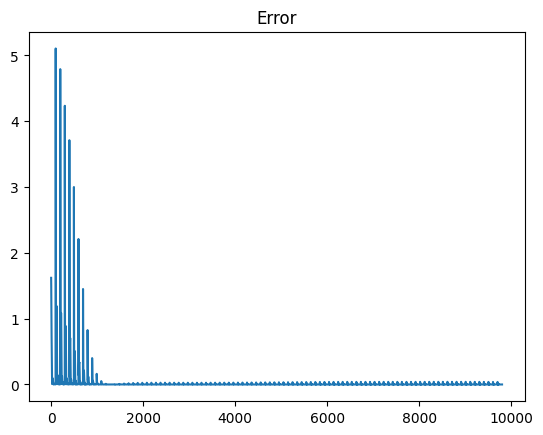

In [ ]:
#@title nn code for order data
loss_list=[]

# du/dx + du/dy = 1 + 2y + 2x , u(0,0) = 0.0

x = np.linspace(0,1,100)
y = np.linspace(0,1,100)

for j in range(len(y)-1):
    for i in range(len(x)-1):
        u00 = model(torch.tensor([0.0,0.0]))
        xa = float(x[i])
        xb = float(x[i+1])
        ya = float(y[j])
        yb = float(y[j+1])

        ua = model(torch.tensor([xa,ya]))
        ub = model(torch.tensor([xb,yb]))

        dudx = (ub-ua)/(xb-xa)
        dudy = (ub-ua)/(yb-ya)

        loss1 = criterion(dudx + dudy , torch.tensor([ 1 + 2*yb + 2*xb ]))
        loss2 = criterion(u00, torch.tensor([0.0,0.0]))
        loss = loss1 + loss2

        ####################
        loss_list.append(loss.item())
        ####################
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
plt.title("Error")
plt.plot(loss_list)

<Figure size 640x480 with 0 Axes>

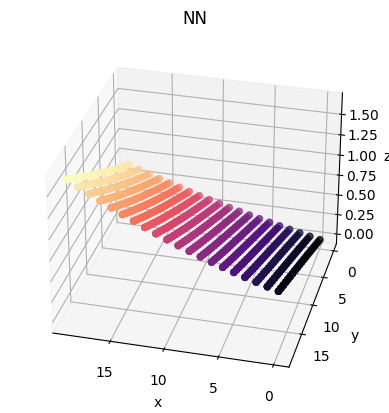

In [ ]:
#@title NN predict plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML
fig = plt.figure()
# Define a list of tuples with x, y, and z coordinates
data = []
for x in range(0,20):
    for y in range(0,20):
        z = model(torch.tensor([x/20,y/20]))[0].item()
        data.append([x,y,z])
# Extract the x, y, and z coordinates from the list of tuples
x = [t[0] for t in data]
y = [t[1] for t in data]
z = [t[2] for t in data]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z)

# Set the axis labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('NN')
#plt.show()
def init():
    ax.scatter(x, y, z, c=1*c, cmap=plt.cm.magma)
    #ax.scatter(x, y, z, c='r', marker='o')
    #ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
    return fig,
def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,
#p = ax.scatter(x,y,z,c='r', marker='o')
c = np.arange(len(x)) / len(x)  # create some colours

#p = ax.scatter(x, y, z, c=1*c, cmap=plt.cm.magma)
#fig.colorbar(p)
# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=30, interval=100, blit=True)

HTML(ani.to_html5_video())

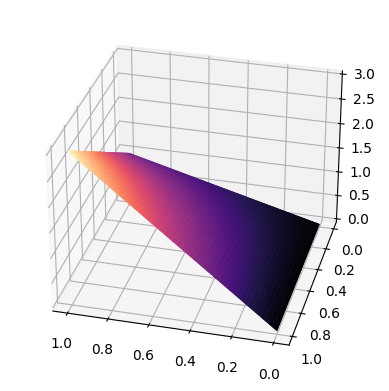

In [ ]:
#@title exact plot
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#####################################################
def function(x, y):
	return x+2*x*y


x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
#####################################################
X, Y = np.meshgrid(x, y)
Z = function(X, Y)
#ax.grid(False)
#ax.set_axis_off()

def init():
    ax.plot_surface(X, Y, Z, cmap='magma', alpha=0.8)
    #ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
    return fig,

def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=30, interval=100, blit=True)

HTML(ani.to_html5_video())

# **shuffle data**

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


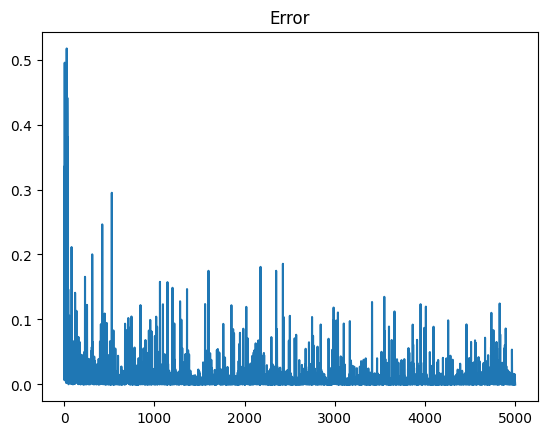

In [ ]:
#@title nn code for shuffle data
import random
loss_list=[]

# du/dx + du/dy = 1 + 2y + 2x , u(0,0) = 0.0

x = np.linspace(0,1,100)
y = np.linspace(0,1,100)


for _ in range(5000):
    i = random.randint(1,98)
    j = random.randint(1,98)
    u00 = model(torch.tensor([0.0,0.0]))
    xa = float(x[i])
    xb = float(x[i+1])
    ya = float(y[j])
    yb = float(y[j+1])

    ua = model(torch.tensor([xa,ya]))
    ub = model(torch.tensor([xb,yb]))

    dudx = (ub-ua)/(xb-xa)
    dudy = (ub-ua)/(yb-ya)

    loss1 = criterion(dudx + dudy , torch.tensor([ 1 + 2*yb + 2*xb ]))
    loss2 = criterion(u00, torch.tensor([0.0,0.0]))
    loss = loss1 + loss2

    ####################
    loss_list.append(loss.item())
    ####################
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
plt.title("Error")
plt.plot(loss_list)

<Figure size 640x480 with 0 Axes>

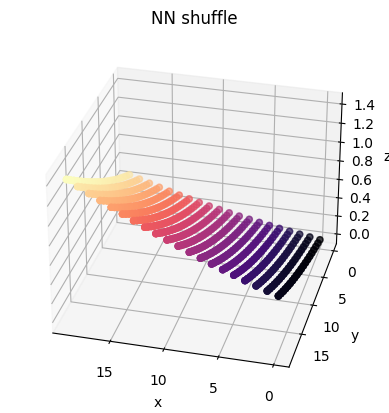

In [ ]:
#@title NN plot shuffle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML
fig = plt.figure()
# Define a list of tuples with x, y, and z coordinates
data = []
for x in range(0,20):
    for y in range(0,20):
        z = model(torch.tensor([x/20,y/20]))[0].item()
        data.append([x,y,z])
# Extract the x, y, and z coordinates from the list of tuples
x = [t[0] for t in data]
y = [t[1] for t in data]
z = [t[2] for t in data]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z)

# Set the axis labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('NN shuffle')
#plt.show()
def init():
    ax.scatter(x, y, z, c=1*c, cmap=plt.cm.magma)
    #ax.scatter(x, y, z, c='r', marker='o')
    #ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
    return fig,
def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,
#p = ax.scatter(x,y,z,c='r', marker='o')
c = np.arange(len(x)) / len(x)  # create some colours

#p = ax.scatter(x, y, z, c=1*c, cmap=plt.cm.magma)
#fig.colorbar(p)
# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=30, interval=100, blit=True)

HTML(ani.to_html5_video())